<a href="https://colab.research.google.com/github/PROFESSORRQ/ANSH/blob/main/Ansh_101803121_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import missingno as ms

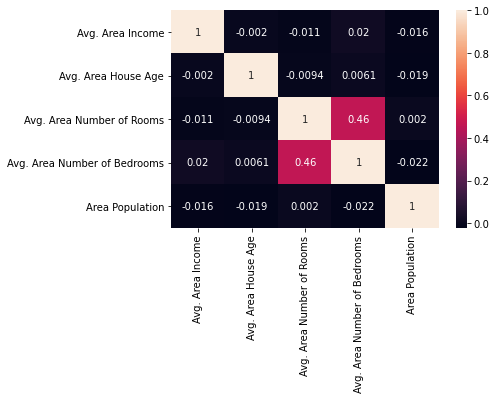

In [ ]:
df=pd.read_csv('USA_Housing.csv')
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

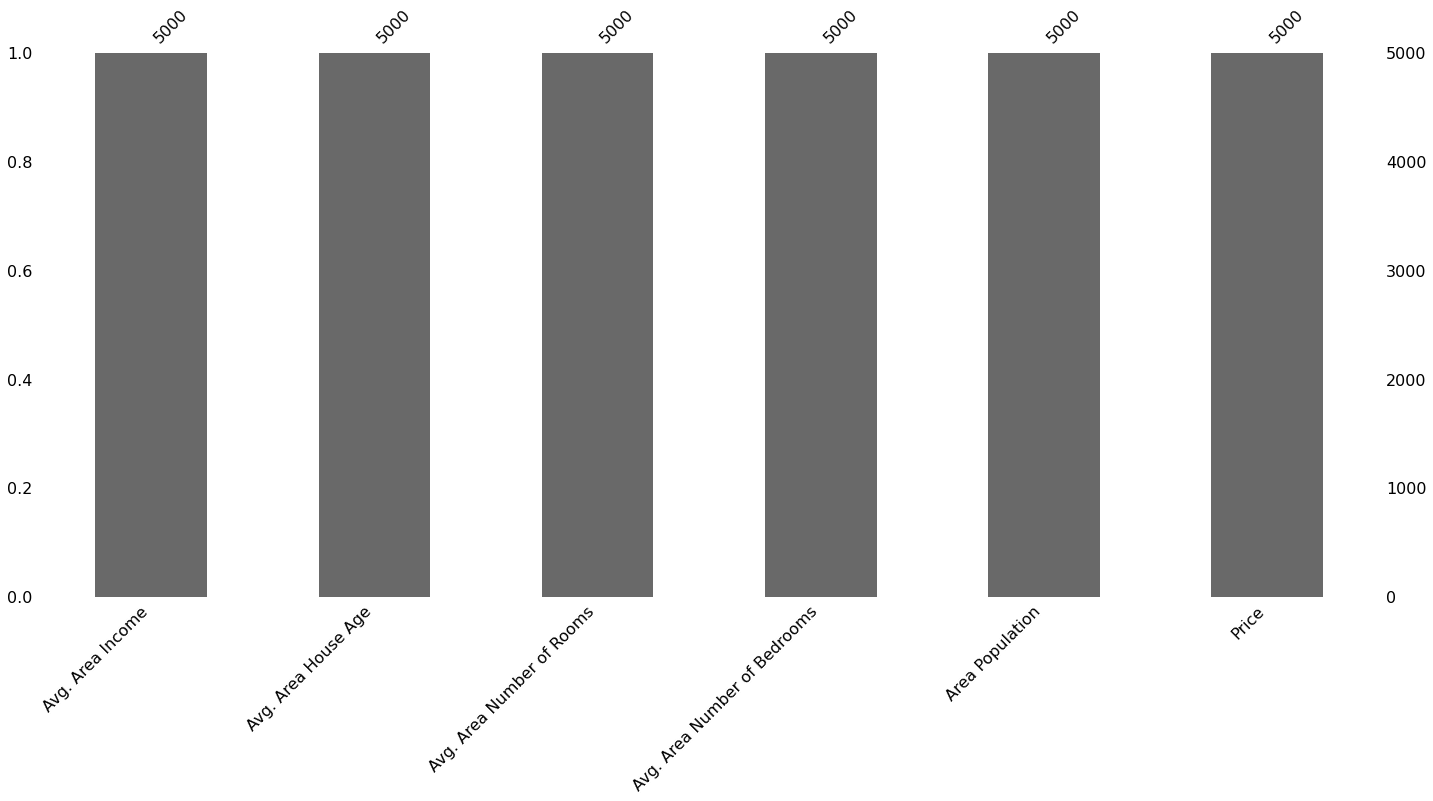

In [ ]:
ms.bar(df)

### Q1(a). Divide the dataset into input features (all columns except price) and output variable (price)

In [ ]:
X = df.iloc[:,:5]
Y = df.iloc[:,5]

### Q1(b). Scale the values of input features.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.insert(X_scaled,0,values=1,axis=1)

### Q1(c). and Q1(d).

In [ ]:
counta = 0
countb = 1000
betas = []

for i in range(5):
    X_train = X_scaled[counta:countb,:]
    Y_train = Y[counta:countb]
    
    
    X_test1 = X_scaled[:counta,:]
    X_test2 = X_scaled[countb:,:]
    X_test = np.concatenate((X_test1,X_test2))
    
    Y_test1 = Y[:counta]
    Y_test2 = Y[countb:]
    Y_test = np.concatenate((Y_test1,Y_test2))
    
    A = X_train.T.dot(X_train)
    B = np.linalg.inv(A)
    C = B.dot(X_train.T)
    beta = C.dot(Y_train)
    betas.append(beta)
    
    Y_predict = X_test.dot(beta)
    
    error = Y_test - Y_predict
    sum_square = np.sum(np.power(error,2))
    Y_mean = np.mean(Y_test)
    total_sum_square = np.sum((Y_test - Y_mean)**2)
    #print(total_sum_square)
    #print(sum_square)
    #print(" ")
    R2 = 1-sum_square/total_sum_square
    
    print(f"Fold {i+1} : For training set from {counta} to {countb} ->",R2)
    
    counta+=1000
    countb+=1000

Fold 1 : For training set from 0 to 1000 -> 0.9173785491039913
Fold 2 : For training set from 1000 to 2000 -> 0.9163103886832772
Fold 3 : For training set from 2000 to 3000 -> 0.9182033941358885
Fold 4 : For training set from 3000 to 4000 -> 0.9159324388183336
Fold 5 : For training set from 4000 to 5000 -> 0.9184200119874923


### Q1(e). Use the best value of (β) matrix (for which R2_score is maximum), to train the regressor for 70% of data and test the performance for remaining 30% data.

In [ ]:
#maximum R2 is for fold 5
optimal_beta = betas[4]
optimal_beta

array([1228395.64873178,  226609.86315982,  166215.40330451,
        119035.36375791,    5285.24637925,  153581.05825795])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size =0.3, random_state = 1)
y_pred = X_test.dot(optimal_beta)
r2_score(y_test, y_pred)

0.9165788266924084

----------

### Q2. Concept of Validation set for Multiple Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('USA_Housing.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
betas = []

sc = StandardScaler()
X_transformed = sc.fit_transform(X)
X_transformed = np.insert(X_transformed, 0, values = 1, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size =0.3, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

l_rate = [0.001, 0.01, 0.1, 1]
epochs = 1000
n = len(X_train)
r2 = []

for learning_rate in l_rate:
    beta = np.zeros(6)
    for i in range(epochs):
        x0_gradient=0
        x1_gradient=0
        x2_gradient=0
        x3_gradient=0
        x4_gradient=0
        x5_gradient=0
        for j in range(n):
            a = X_train[j,0]
            b = X_train[j,1]
            c = X_train[j,2]
            d = X_train[j,3]
            e = X_train[j,4]
            f = y_train[j]
            
            x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)
            x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*a)
            x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*b)
            x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*c)
            x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*d)
            x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*e)
            
        beta[0]=beta[0]-learning_rate/n*x0_gradient
        beta[1]=beta[1]-learning_rate/n*x1_gradient
        beta[2]=beta[2]-learning_rate/n*x2_gradient
        beta[3]=beta[3]-learning_rate/n*x3_gradient
        beta[4]=beta[4]-learning_rate/n*x4_gradient
        beta[5]=beta[5]-learning_rate/n*x5_gradient
        
    y_pred = X_test.dot(beta) 
    r2.append(r2_score(y_test, y_pred))    
    print(f"Beta for learning rate {learning_rate} is ->",beta)
    betas.append(beta)

Beta for learning rate 0.001 is -> [533864.38106375 533864.38106375 145139.83127764 105826.36602249
  65332.72820265  20613.07320798]
Beta for learning rate 0.01 is -> [616581.56074126 616581.56074126 227118.83257667 162662.02019426
 124606.48810405    864.78988514]
Beta for learning rate 0.1 is -> [6.16582360e+05 6.16582360e+05 2.27144336e+05 1.62690885e+05
 1.24964095e+05 5.19710121e+02]
Beta for learning rate 1 is -> [-18627725.27133379 -18627725.27133379   -278292.14541702
   -380595.3024752    1540471.6374478    1295552.33992304]


In [ ]:
max_index = r2.index(max(r2))
optimal_beta = betas[max_index]
y_pred_final = X_test.dot(optimal_beta)
r2_final = r2_score(y_test, y_pred_final)

---

### Q3. Pre-processing and Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
columns = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
df = pd.read_csv('imports-85.csv', names = columns)
df.shape

(205, 26)

In [ ]:
df = df.replace('?', np.nan)
df = df.dropna()
cleanup_nums = {"num_doors": {"four": 4, "two": 2},"num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,"two": 2, "twelve": 12, "three":3 }}

df = df.replace(cleanup_nums)
df = pd.get_dummies(df, columns = ["body_style", "drive_wheels"], prefix=["body","drive"])

cols = ["make", "aspiration", "engine_location", "fuel_type"]
for col in cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    
df["PFI_Code"] = np.where(df["fuel_system"].str.contains("pfi"), 1, 0)
df["OHC_Code"] = np.where(df["engine_type"].str.contains("ohc"), 1, 0)
df = df.drop(['engine_type', 'fuel_system'], axis = 1)
df.shape

(159, 32)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X = df.iloc[ : , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25, 26,27,28,29,30,31]]
y = df.iloc[ : , 21]
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 1)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("R2 score is ->",r2_score(y_test, y_pred))

R2 score is -> 0.8110367440686037


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1', 'PC2','PC3'])

x_train,x_test,y_train,y_test=train_test_split(principalDf,y,test_size=0.3, random_state = 1)

In [ ]:
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2 score is ->",r2_score(y_test, y_pred))

R2 score is -> 0.8059831247922996
